# ADA - P4 - Creative Extension

<br>

**Group Members:** Diego Canton, Sebastien Emery, Yat-tsai Wan <br>
**Related Paper:** J. Leskovec, D. Huttenlocher, and J. Kleinberg, ‘Signed networks in social media’, in Proceedings of the 28th international conference on Human factors in computing systems

In [1]:
# Let's load necessary libraries and the datasets
%load_ext autoreload
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv
import pickle 
import matplotlib as mpl
#Using SigNet
from signet.cluster import *
from signet.utils import * 
from signet.block_models import *
import igraph
import matplotlib as mpl

import networkx.algorithms as algo
from IPython.display import display_html
mpl.rcParams['figure.dpi']= 140
%autoreload 2
pkl = './pkl/'
PATH = "data/"

def display_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

# Signed network in social media, the effect of homophily

## Load dataset

The dataset was previously parsed in P2, we load only the edge list dataframe obtained after parsing

In [2]:
# load dataset from pickle (previously parsed)

wiki = pd.read_pickle('pkl/wikipedia_parsed.pkl')
wiki

,FromNodeId,ToNodeId,Sign
0,3,30,1
1,25,30,-1
2,4,30,1
3,5,30,1
4,6,30,1
...,...,...,...
103684,8045,6307,-1
103685,7053,6307,-1
103686,6885,6307,-1
103687,8243,6307,-1


## Transform df to networkx graph

In [3]:
# Multi Directed Graph 
G_wiki = nx.from_pandas_edgelist(wiki, 'FromNodeId', 'ToNodeId', edge_attr='Sign', create_using=nx.MultiDiGraph())
print('Multi Directed Graph - Nodes: {n}, Edges: {e}'.format(n=nx.number_of_nodes(G_wiki), e=nx.number_of_edges(G_wiki)))

Multi Directed Graph - Nodes: 7115, Edges: 103689


## Look at connected components in the graph

We look at the comnnected components in the network and we will work with the biggest one

In [4]:
# this function only take undirected graph
CC_generator = nx.algorithms.components.connected_components(G_wiki.to_undirected(as_view=True))

In [5]:
d = {}
for ind, cc in enumerate(CC_generator):
    d['cc_'+str(ind)] = G_wiki.subgraph(cc)
    print('{i}: subGraph - Nodes: {n}, Edges: {e}'.format(i=ind, n=nx.number_of_nodes(d['cc_'+str(ind)]), e=nx.number_of_edges(d['cc_'+str(ind)])))

0: subGraph - Nodes: 7066, Edges: 103663
1: subGraph - Nodes: 2, Edges: 1
2: subGraph - Nodes: 2, Edges: 1
3: subGraph - Nodes: 2, Edges: 1
4: subGraph - Nodes: 2, Edges: 1
5: subGraph - Nodes: 2, Edges: 1
6: subGraph - Nodes: 2, Edges: 1
7: subGraph - Nodes: 2, Edges: 1
8: subGraph - Nodes: 2, Edges: 1
9: subGraph - Nodes: 2, Edges: 1
10: subGraph - Nodes: 2, Edges: 1
11: subGraph - Nodes: 2, Edges: 1
12: subGraph - Nodes: 2, Edges: 1
13: subGraph - Nodes: 2, Edges: 1
14: subGraph - Nodes: 2, Edges: 1
15: subGraph - Nodes: 3, Edges: 2
16: subGraph - Nodes: 2, Edges: 1
17: subGraph - Nodes: 2, Edges: 1
18: subGraph - Nodes: 3, Edges: 2
19: subGraph - Nodes: 2, Edges: 1
20: subGraph - Nodes: 2, Edges: 1
21: subGraph - Nodes: 2, Edges: 1
22: subGraph - Nodes: 2, Edges: 1
23: subGraph - Nodes: 3, Edges: 2


In [6]:
# We take only the first one since other connected componenents have only 2 or 3 nodes, so not interesting to analyze

cc_graph = d['cc_0'].copy()

## Get Degree Distribution for Wikipedia

In [7]:
def get_degree_graphs(edgelist, color, bins, kde = True ):#, **color):
    #Plotting graph degree: 
    #The degree is number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node
    directed_cc = nx.from_pandas_edgelist(edgelist, "FromNodeId", "ToNodeId", edge_attr="Sign", create_using = nx.DiGraph)
    degree_signed = pd.DataFrame(nx.degree(directed_cc, weight= "Sign"), columns = ["Node", "Degree"]).sort_values("Degree").reset_index(drop=True)
    degree_none = pd.DataFrame(nx.degree(directed_cc, weight= None), columns = ["Node", "Degree"]).sort_values("Degree").reset_index(drop=True)
    
    fig, axs = plt.subplots(1,2, figsize=(12,5))
    #sns.set_palette(**color)
    
    sns.histplot(degree_signed["Degree"], ax=axs[0], bins=bins, kde=kde, color = color)
    axs[0].set_title("With Sign as weight")
    
    sns.histplot(degree_none["Degree"], ax=axs[1], bins=bins, kde=kde, color = color)
    axs[1].set_title("With None as weight")
    #print(" Signed \t vs \t Not Signed")
    print("MAX SIGNED",degree_signed.max())
    print("MAXUNSIGNED", degree_none.max())
    return fig ,axs

def set_lim(f,a, xmin1, xmax1, ymin1, ymax1,
           xmin2, xmax2, ymin2, ymax2):
    a[0].set_xlim([xlim1, xmax1])
    a[0].set_ylim([ymin1, ymax1])
    
    a[1].set_xlim([xmin2, xmax2])
    a[1].set_ylim([ymin2, ymax2])
    
    display(f)

sns.set_theme(style="darkgrid")
pal_aff = sns.color_palette('pastel', n_colors=3)#, as_cmap = True)
pal_aff[-1] = (0.53, 0.31, 0.8)
mpl.rcParams['figure.dpi']= 140

MAX SIGNED Node      8297
Degree     695
dtype: int64
MAXUNSIGNED Node      8297
Degree    1167
dtype: int64


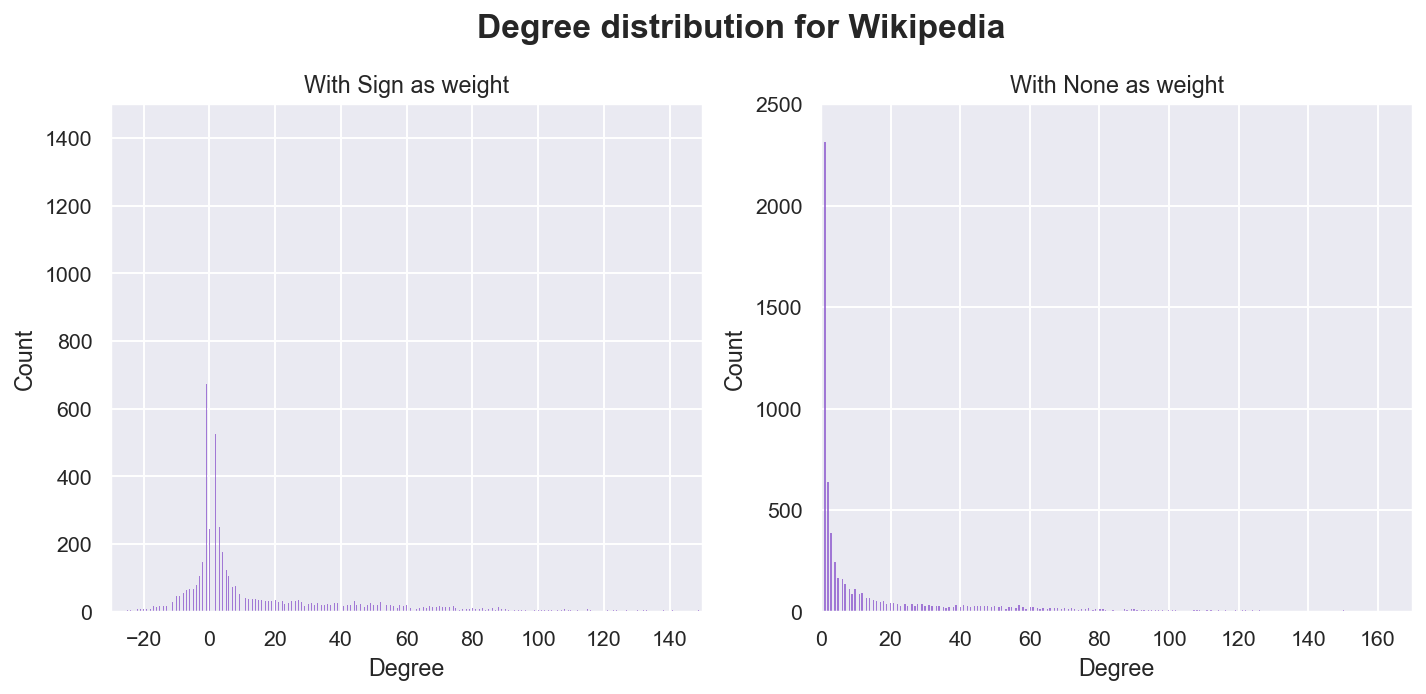

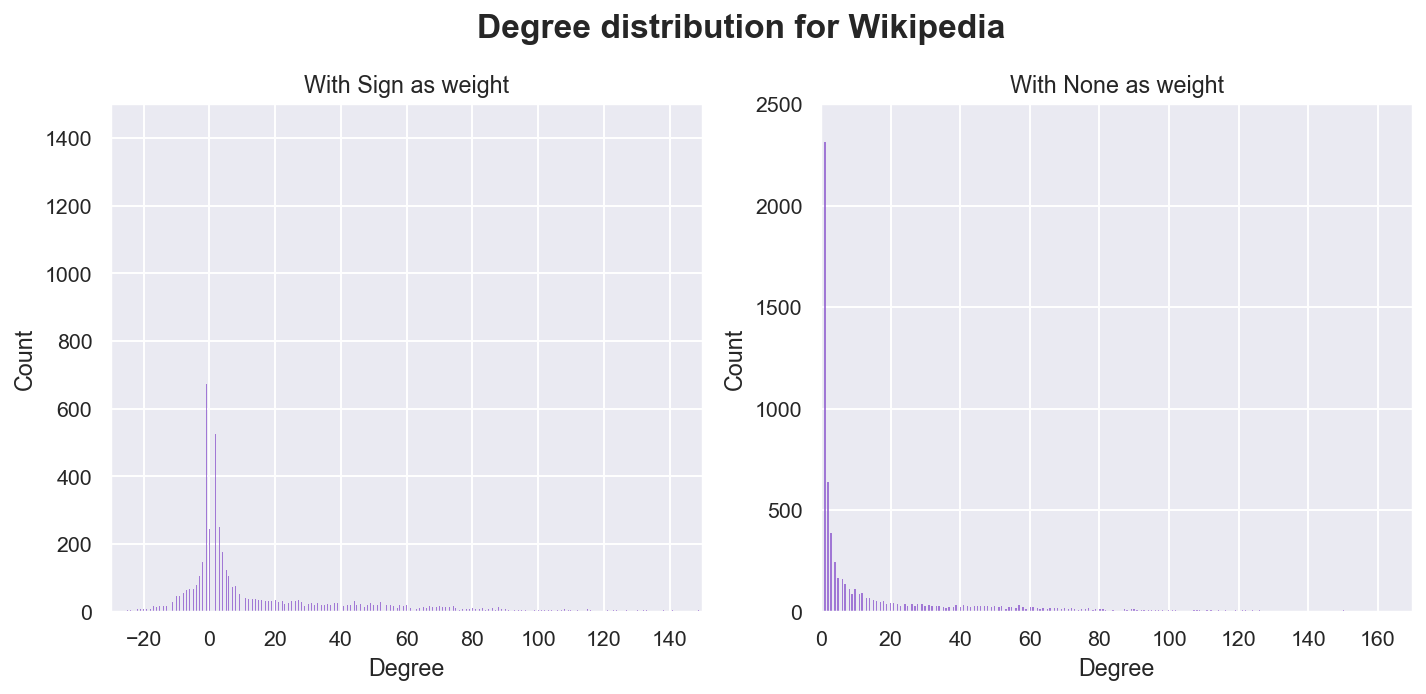

In [8]:
f2, a2 = get_degree_graphs(wiki, pal_aff[2], 2850, False)
a2[0].set_xlim([-30,150])
a2[0].set_ylim([0,1500])

a2[1].set_xlim([0,170])
a2[1].set_ylim([0, 2500])
plt.subplots_adjust(top=0.85)
f2.suptitle('Degree distribution for Wikipedia',
                  fontsize='x-large',weight=575);
display(f2)

# Load dataset

In [9]:
# slashdots
slashdot = pd.read_csv(PATH+"soc-sign-Slashdot090221.txt",sep= "\t", header=None, names = ["FromNodeId", "ToNodeId", "Sign"], skiprows = 4)
slashdot.drop(index=slashdot.query('FromNodeId == ToNodeId').index, inplace=True)
slashdot.reset_index(inplace=True,drop=True)

# epinions
epinions = pd.read_csv(PATH+"soc-sign-epinions.txt",sep= "\t",  header=None, names = ["FromNodeId", "ToNodeId", "Sign"], skiprows = 4)
epinions.drop(index=epinions.query('FromNodeId == ToNodeId').index, inplace=True)
epinions.reset_index(inplace=True,drop=True)

## Look at degree distribution of Slashdot and Epinons dataset

In this first part, we look at some statistics of our dataset and more particularly the degree distribution, because we are interested in findings "clusters" based on the homophily theory which correlates people with metrics based on the degree. Thus, we can compare those value to the one of our subnetworks we will study.

The degree of a node is defined as all the connection it makes: $ D = \sum_{edges\in\ node} 1$

MAX SIGNED Node      131827
Degree      3142
dtype: int64
MAXUNSIGNED Node      131827
Degree      3622
dtype: int64


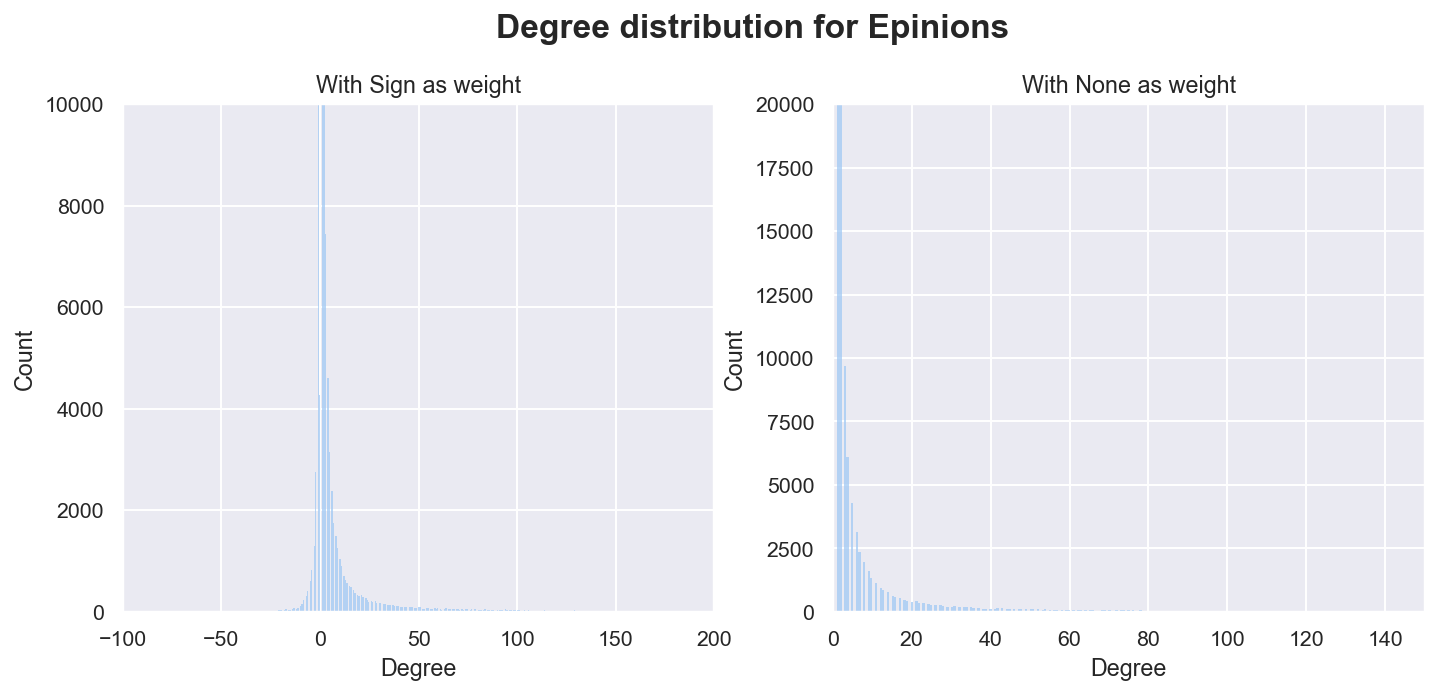

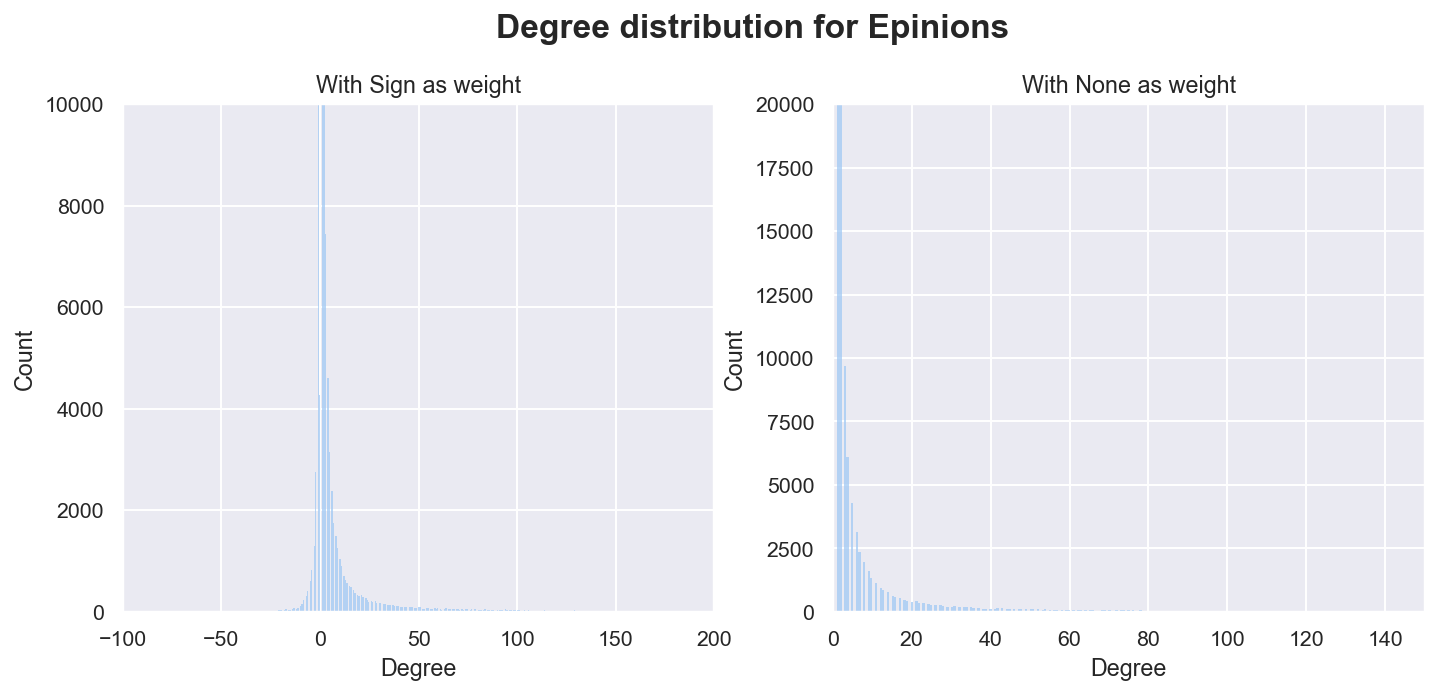

In [10]:
f,a = get_degree_graphs(epinions, pal_aff[0],6000, False)
a[0].set_xlim([-100,200])
a[0].set_ylim([0,10000])

a[1].set_xlim([0,150])
a[1].set_ylim([0,20000])
plt.subplots_adjust(top=0.85)
f.suptitle('Degree distribution for Epinions',
                  fontsize='x-large',weight=575);

display(f)

MAX SIGNED Node      82143
Degree     2495
dtype: int64
MAXUNSIGNED Node      82143
Degree     2557
dtype: int64


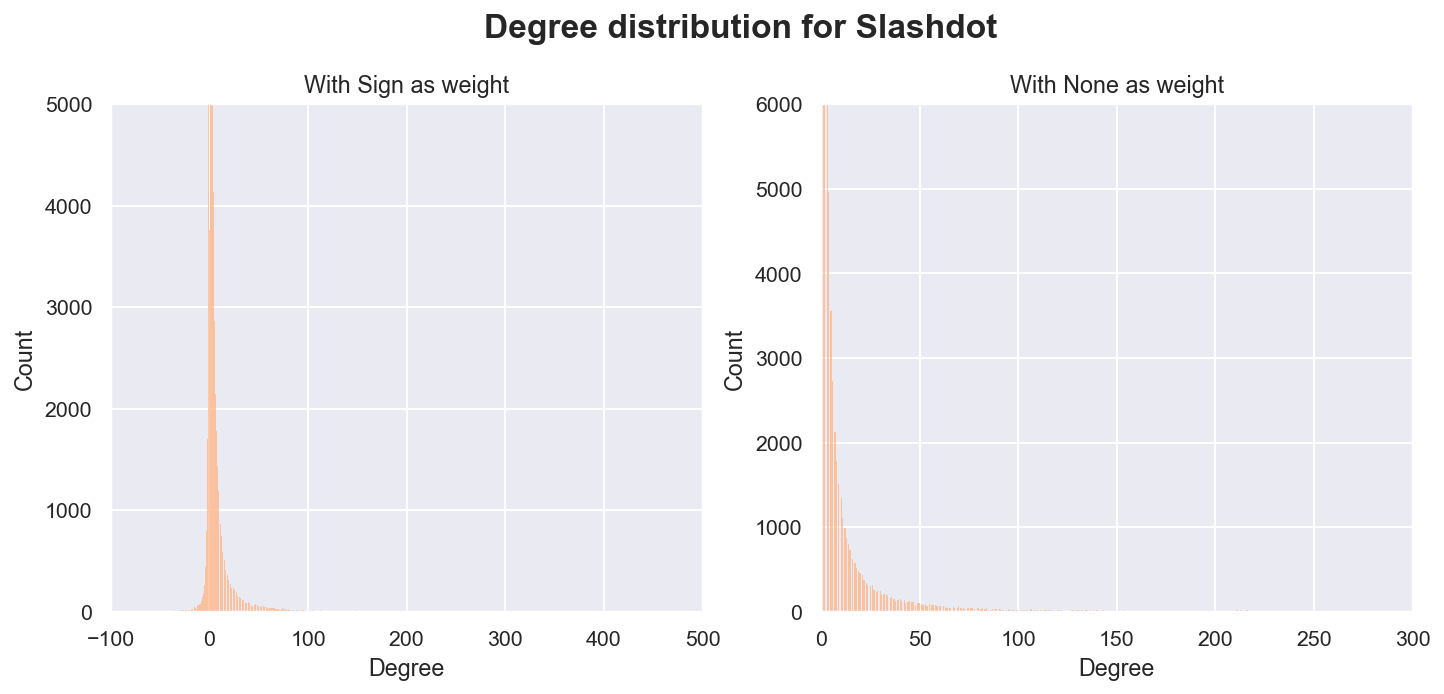

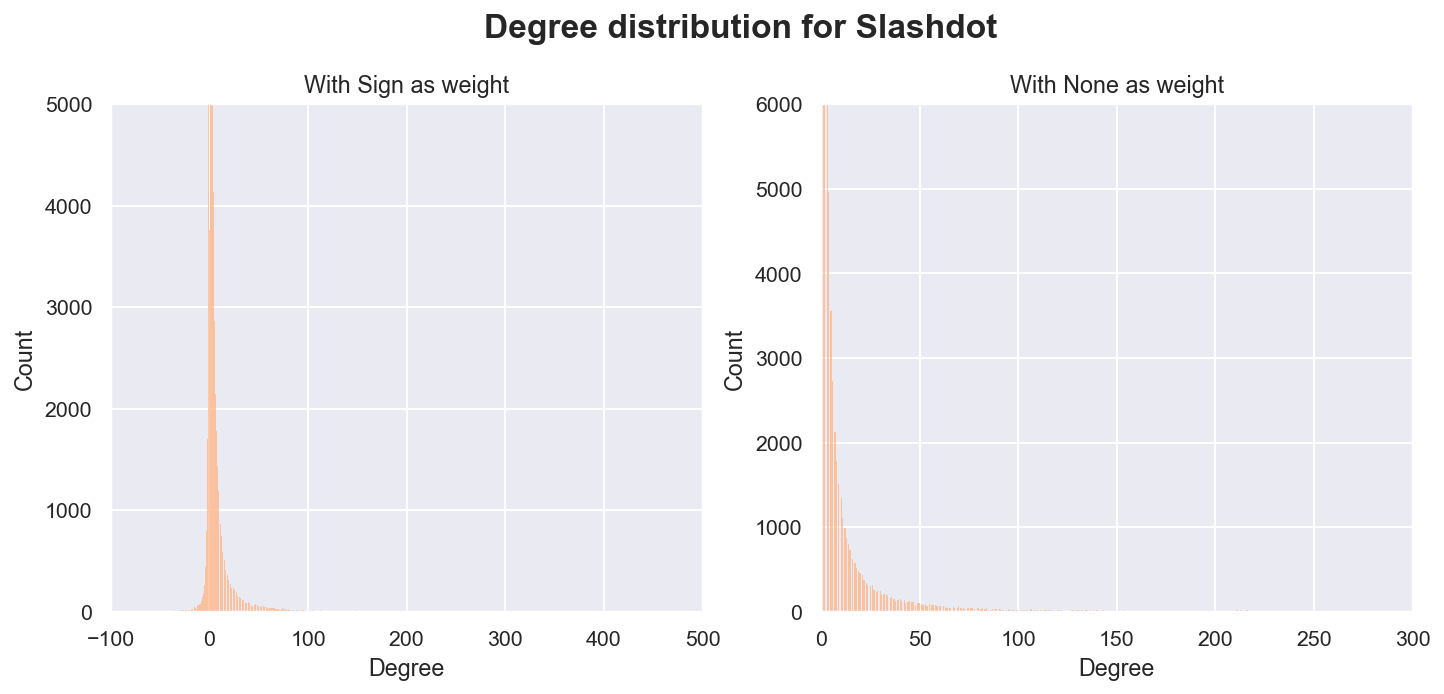

In [11]:
f1, a1 = get_degree_graphs(slashdot, pal_aff[1],4000,False)
a1[0].set_xlim([-100,500])
a1[0].set_ylim([0,5000])

a1[1].set_xlim([0,300])
a1[1].set_ylim([0,6000])
plt.subplots_adjust(top=0.85)
f1.suptitle('Degree distribution for Slashdot',
                  fontsize='x-large',weight=575);
display(f1)

We see that for both network, the degree distribution seems to naturally follow a power law meaning that most of the nodes in the network are weakly connected and that a few are very well connected. Thus we are working with sparse graph.

# Load into networkx graphs

In [12]:
G_epi = nx.from_pandas_edgelist(epinions, 'FromNodeId', 'ToNodeId', edge_attr='Sign', create_using=nx.MultiGraph())
print('Multi Directed Graph - Nodes: {n}, Edges: {e}'.format(n=nx.number_of_nodes(G_epi), e=nx.number_of_edges(G_epi)))

G_sld = nx.from_pandas_edgelist(slashdot, 'FromNodeId', 'ToNodeId', edge_attr='Sign', create_using=nx.MultiGraph())
print('Multi Directed Graph - Nodes: {n}, Edges: {e}'.format(n=nx.number_of_nodes(G_sld), e=nx.number_of_edges(G_sld)))

Multi Directed Graph - Nodes: 131580, Edges: 840799
Multi Directed Graph - Nodes: 82140, Edges: 549202


# Get reciprocated networks

To clarify the relation beetween individuals in the network, we choose to only consider the reciprocated edges with the same sign. This allows us to further consider the graph as undirected and study it. Moreover, we want to characterize the structural behaviour of negative and positive links between nodes in the network. To do so we further split the reciprocate subnetwork into two new subnetworks, one composed of only negative edges and one of positive.



![reciprocated](./images_datastory/reciprocated_net.png)
<center> From: Ciotti, Valerio. Positive and negative connections and homophily in complex networks. Diss. Queen Mary University of London, 2018. </center>


In [13]:
def get_reciprocal_edgelist(edgelist):
    
    reciprocated = []
    for index, n1 in enumerate(np.unique(edgelist['FromNodeId'])):
        for n2 in [x for x in edgelist.query('FromNodeId==@n1')['ToNodeId'].values]:
            
            bwd_link = edgelist.query('FromNodeId==@n2 & ToNodeId == @n1').values #link back from n2 to n1
            
            #Check if there's a link both ways, if not continue
            if len(bwd_link)==0:
                continue
                
            bwd_tpl = tuple(bwd_link[0])
            #Check if already in list
            if bwd_tpl in reciprocated:
                continue
            
             #Get the sign of the link
            fwd_link = edgelist.query('FromNodeId==@n1 & ToNodeId == @n2').values
            fwd_tpl = tuple(fwd_link[0])
            sign = fwd_tpl[2]
            
            #Check signs by checking index 2 of tuples
            if bwd_tpl[2] != fwd_tpl[2]:continue #Not same sign
            elif bwd_tpl[2] == fwd_tpl[2]: 
                #If reciprocal with same sign, append both
                reciprocated.append(fwd_tpl)
                reciprocated.append(bwd_tpl)
            
        print('{:.2%} done'.format(index/len(np.unique(edgelist['FromNodeId']))), end="\r")
    df = pd.DataFrame(data=reciprocated, columns=['FromNodeId','ToNodeId','Sign'])
    return df


def filter_nodelist(df, nodelist, sign):
    print("Number of nodes in initial community without any filtering : ", len(nodelist))
    subset_1 = df.query('FromNodeId in @nodelist')
    comm_1 = subset_1.query('ToNodeId in @nodelist')
    negs = []
    for x in comm_1.values:
        if x[2] == sign:
            negs.append(x[0])
            negs.append(x[1])
    negatives = np.unique(negs)
    print("Number of nodes with negative links within community :",len(negatives))
    new_nodelist = [x for x in nodelist if x not in negatives]
    print("Number of nodes in filtered new nodelist : ",len(new_nodelist))
    
    #Remaking a subset like above
    new_subset = df.query('FromNodeId in @new_nodelist')
    new_community = new_subset.query('ToNodeId in @new_nodelist')
    re_filter = []
    for node_1 in np.unique(new_community['FromNodeId']):
        for node_2 in [x for x in new_community.query('FromNodeId==@node_1')['ToNodeId'].values if x not in re_filter]:
            rec = new_community.query('FromNodeId==@node_2 & ToNodeId==@node_1 & Sign==@sign')['FromNodeId']
            if len(rec)!=0:
                re_filter.append(rec.item())
    re_filter.sort(key=int)
    print("Final number of nodes in largest positively reciprocated linked community :", len(re_filter))
    return re_filter

In [14]:
# Load reciprocal previously saved in a pickle
reciprocal_slashdot = pd.read_pickle('pkl/latest_reciprocal_slashdot.pkl')
reciprocal_epinions = pd.read_pickle('pkl/latest_reciprocal_epinions_edgelist.pkl')

# slashdot
index_sld = np.arange(0,len(reciprocal_slashdot),2)
sld = reciprocal_slashdot.drop(index_sld)

positive_sld = nx.from_pandas_edgelist(sld[sld.Sign == 1], 'FromNodeId', 'ToNodeId', create_using=nx.Graph)
negative_sld = nx.from_pandas_edgelist(sld[sld.Sign == -1], 'FromNodeId', 'ToNodeId', create_using=nx.Graph)

# Epinions
index_epi = np.arange(0,len(reciprocal_epinions),2)
epi = reciprocal_epinions.drop(index_epi)

positive_epi = nx.from_pandas_edgelist(epi[epi.Sign == 1], 'FromNodeId', 'ToNodeId', create_using=nx.Graph)
negative_epi = nx.from_pandas_edgelist(epi[epi.Sign == -1], 'FromNodeId', 'ToNodeId', create_using=nx.Graph)

# General stats

In [15]:
stats = pd.DataFrame([[nx.number_of_nodes(G_epi), nx.number_of_nodes(G_sld)],
                     [nx.number_of_edges(G_epi), nx.number_of_edges(G_sld)], 
                     [epinions[epinions['Sign'] > 0].index.size, slashdot[slashdot['Sign'] > 0].index.size], 
                     [epinions[epinions['Sign'] < 0].index.size, slashdot[slashdot['Sign'] < 0].index.size], 
                      [len(epi.index), len(sld.index)]], index=['Nodes', 'Edges', 'Positive edges', 'Negative edes', 'Reciprocal'], columns=['Epinions', 'Slashdot'])

In [16]:
stats

,Epinions,Slashdot
Nodes,131580,82140
Edges,840799,549202
Positive edges,717129,425072
Negative edes,123670,124130
Reciprocal,126886,46772


## Positive and negative degree distribution for slashdot
Here we recompute the degree and average degree of neighborhood distribution, but for our subnetwork this time.

In [17]:
degree_positive = pd.DataFrame(positive_sld.degree(), columns = ['node','degree'])
degree_positive['sign']='pos'
degree_positive['measure'] = 'deg'
degree_negative = pd.DataFrame(negative_sld.degree(), columns = ['node','degree'])
degree_negative['sign']='neg'
degree_negative['measure'] = 'deg'

nb_deg = nx.algorithms.assortativity.average_neighbor_degree(positive_sld)#, weight ='Sign')
degree_avg_nb_pos = pd.DataFrame(data = [(n,deg) for n,deg in nb_deg.items()], columns = ['node','degree'])
degree_avg_nb_pos['sign']='pos'
degree_avg_nb_pos['measure']='avg_nb'

nb_deg = nx.algorithms.assortativity.average_neighbor_degree(negative_sld)#, weight ='Sign')
degree_avg_nb_neg = pd.DataFrame(data = [(n,deg) for n,deg in nb_deg.items()], columns = ['node','degree'])
degree_avg_nb_neg['sign']='neg'
degree_avg_nb_neg['measure']='avg_nb'

deg_ = pd.concat([degree_positive,degree_negative, degree_avg_nb_pos, degree_avg_nb_neg])
deg_ = deg_.sort_values('degree', ascending=False).reset_index(drop=True)

In [18]:
deg_

,node,degree,sign,measure
0,197,362.0,pos,deg
1,29069,362.0,pos,avg_nb
2,29068,362.0,pos,avg_nb
3,16203,362.0,pos,avg_nb
4,29066,362.0,pos,avg_nb
...,...,...,...,...
49225,16904,1.0,pos,deg
49226,15906,1.0,pos,deg
49227,61925,1.0,pos,deg
49228,42127,1.0,pos,deg


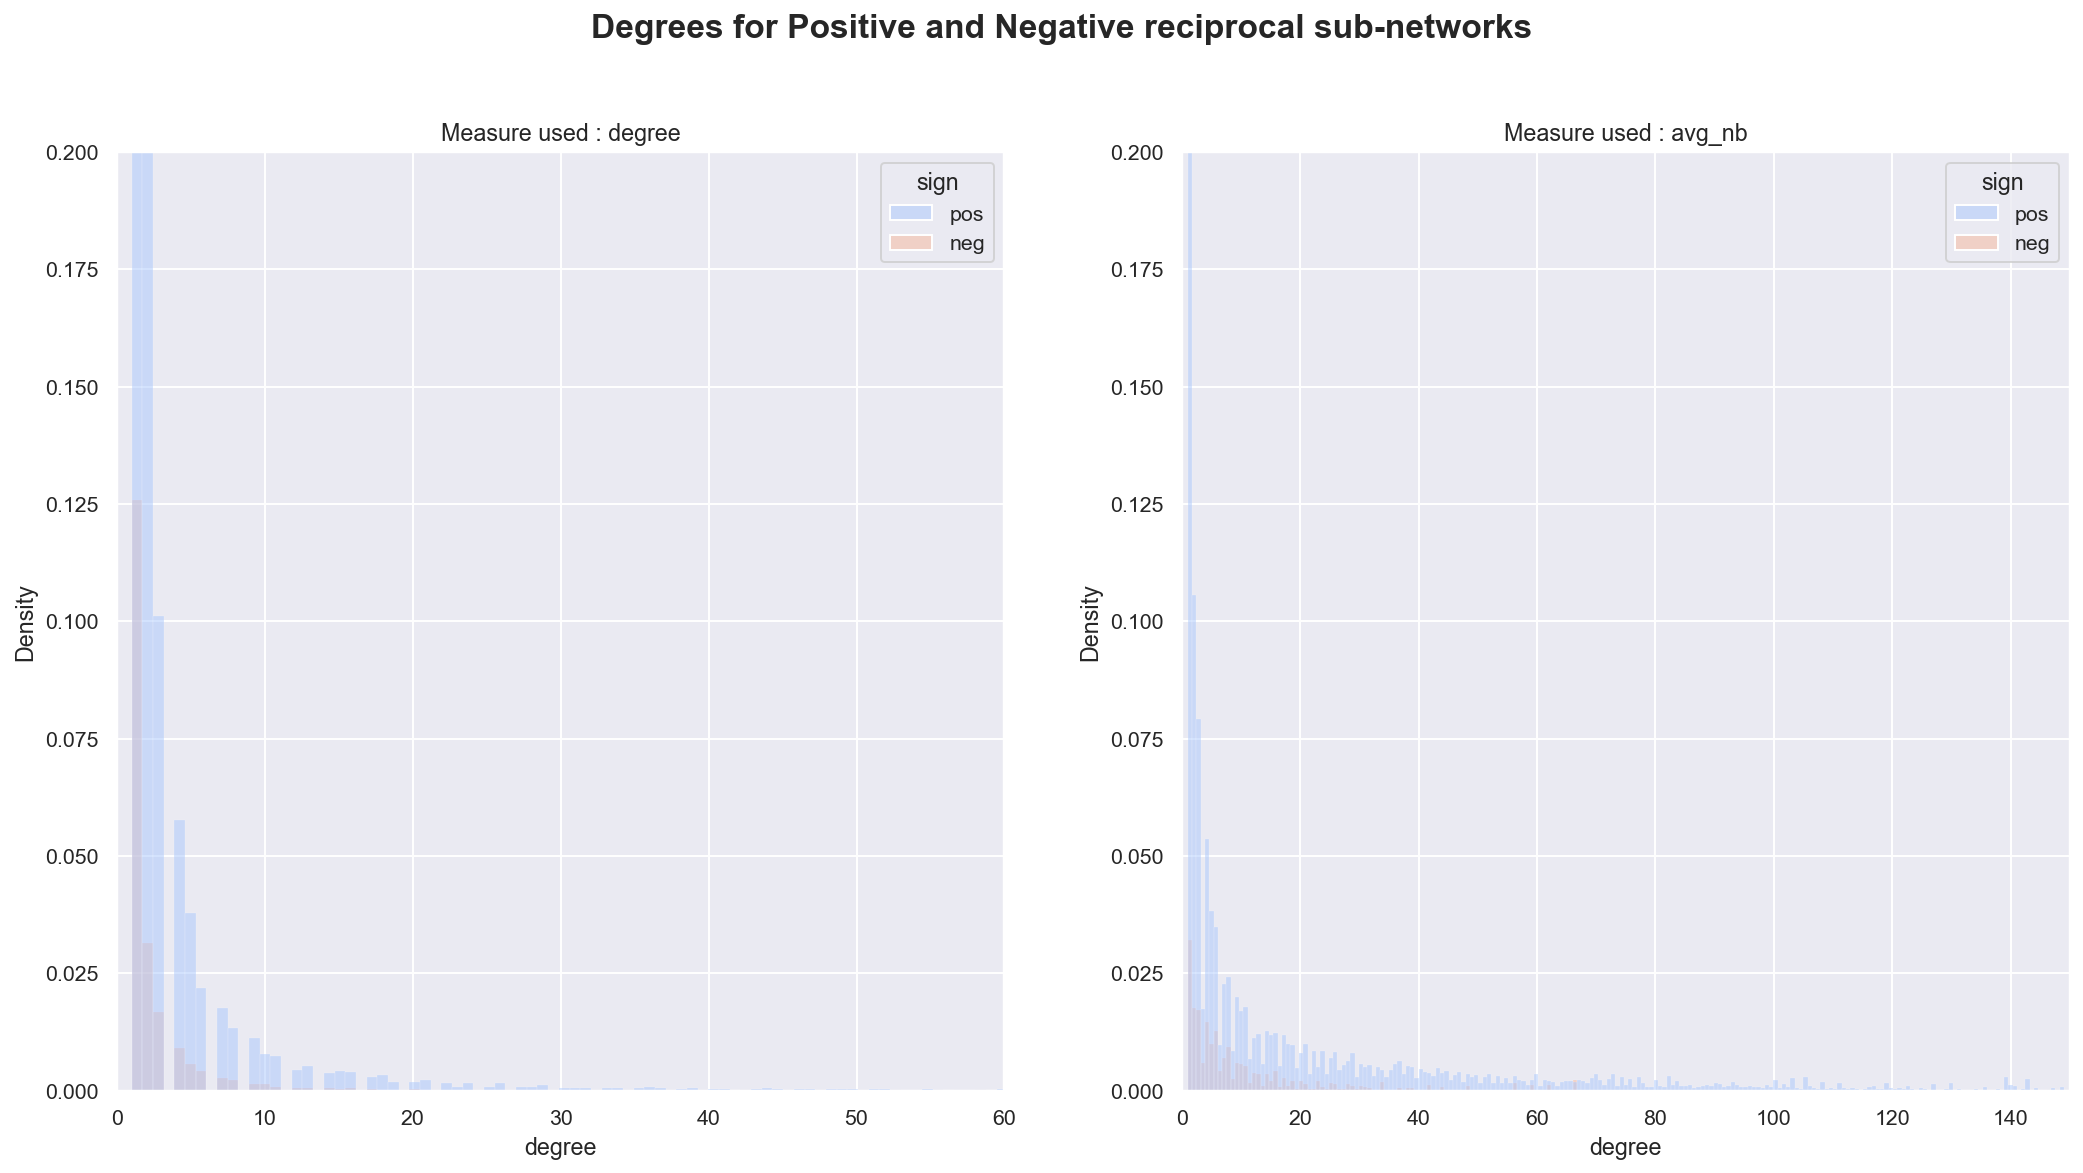

In [19]:
#Plotting graph degree: 
#The degree is number of edges adjacent to the node. The weighted node degree is the sum of the edge weights for edges incident to that node
sns.set_style('darkgrid')


#fig, axs = plt.subplots(1,1, figsize=(3.2,3.2))

sns.set_palette("coolwarm", n_colors=2)
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
g1 = sns.histplot(data=deg_[deg_.measure=='deg'], x='degree', hue='sign', bins=500, stat='density')
plt.subplot(1,2,2)
g2 = sns.histplot(data=deg_[deg_.measure=='avg_nb'], x='degree', hue='sign', bins=500, stat='density')
g1.set(xlim=(0,60),ylim=(0,0.2))
g2.set(xlim=(0,150),ylim=(0,0.2))#g.set(xlim=(0, 60), ylim=(0, 14))

g1.set_title('Measure used : degree')
g2.set_title('Measure used : avg_nb')
#plt.set_titles(col_template = 'Measure used : {col_name}', weight = 575)#, size=18)
plt.subplots_adjust(top=0.87)

plt.suptitle('Degrees for Positive and Negative reciprocal sub-networks', fontsize='x-large',weight=575);

Here again, it seems that naturally our subnetworks' distribution of degree follow a power law.

# Measuring the average degree of the nearest neighbors

Here we want to compute on average for a node of degree k, what is the average degree of its neighborhood, it will allow us to see if similar nodes with similar degree tend to be connected together.

$$k_{nn,i} =\frac{1}{|N(i)|}\sum_{(j)\in N(i)} k_{j}$$  
<center>where</center>
<center> N(i) are the neighbors of node i</center>
<center> $k_{j}$ the degree of node j</center>



In [20]:
# positive
plot_knn_plus_sld = pd.DataFrame.from_dict(nx.algorithms.assortativity.k_nearest_neighbors(positive_sld, source='in+out', target='in+out', nodes=None, weight=None), orient='index', columns=['knn'])
plot_knn_plus_sld['k'] = plot_knn_plus_sld.index
plot_knn_plus_sld = plot_knn_plus_sld[plot_knn_plus_sld.columns[::-1]]
plot_knn_plus_sld = plot_knn_plus_sld.sort_values('k', ascending=False).reset_index(drop=True)

# negative
plot_knn_neg_sld = pd.DataFrame.from_dict(nx.algorithms.assortativity.k_nearest_neighbors(negative_sld, source='in+out', target='in+out', nodes=None, weight=None), orient='index', columns=['knn'])
plot_knn_neg_sld['k'] = plot_knn_neg_sld.index
plot_knn_neg_sld = plot_knn_neg_sld[plot_knn_neg_sld.columns[::-1]]
plot_knn_neg_sld = plot_knn_neg_sld.sort_values('k', ascending=False).reset_index(drop=True)

# positive epinions
plot_knn_plus_epi = pd.DataFrame.from_dict(nx.algorithms.assortativity.k_nearest_neighbors(positive_epi, source='in+out', target='in+out', nodes=None, weight=None), orient='index', columns=['knn'])
plot_knn_plus_epi['k'] = plot_knn_plus_epi.index
plot_knn_plus_epi = plot_knn_plus_epi[plot_knn_plus_epi.columns[::-1]]
plot_knn_plus_epi = plot_knn_plus_epi.sort_values('k', ascending=False).reset_index(drop=True)

# negative epinions
plot_knn_neg_epi = pd.DataFrame.from_dict(nx.algorithms.assortativity.k_nearest_neighbors(negative_epi, source='in+out', target='in+out', nodes=None, weight=None), orient='index', columns=['knn'])
plot_knn_neg_epi['k'] = plot_knn_neg_epi.index
plot_knn_neg_epi = plot_knn_neg_epi[plot_knn_neg_epi.columns[::-1]]
plot_knn_neg_epi = plot_knn_neg_epi.sort_values('k', ascending=False).reset_index(drop=True)

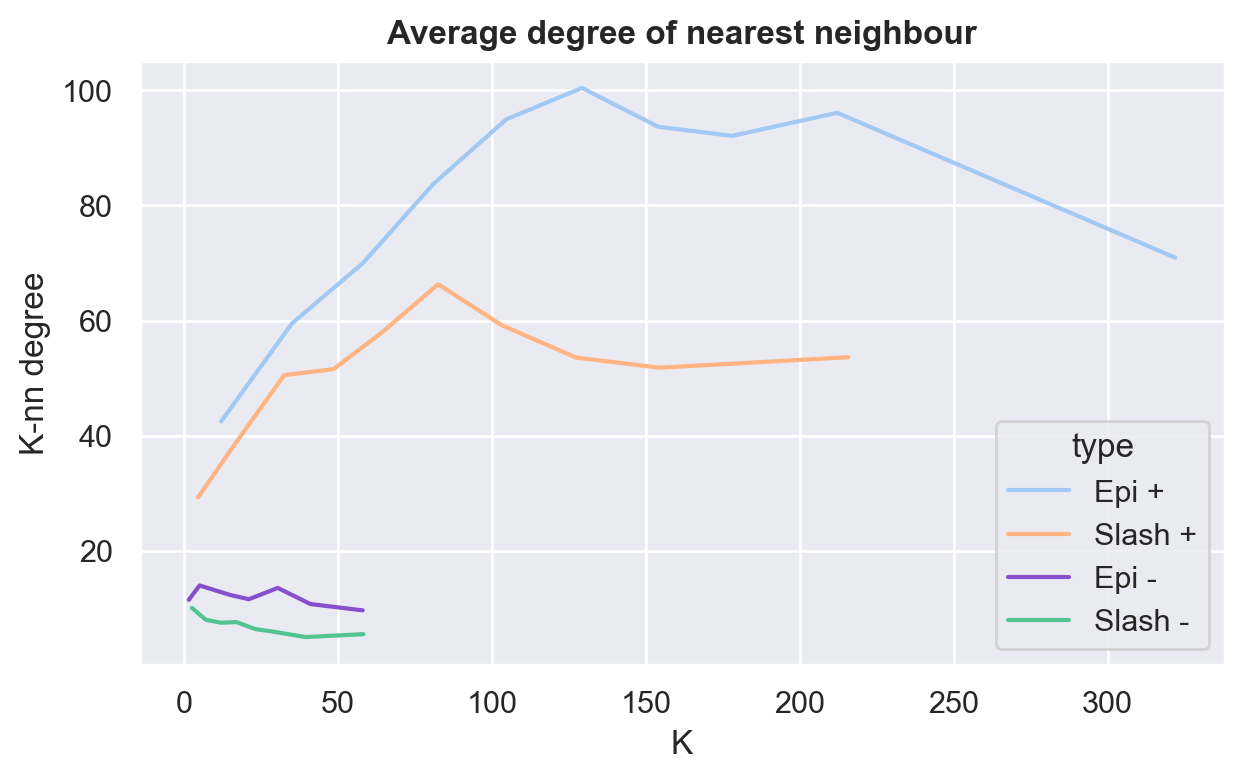

In [21]:
mpl.rcParams['figure.dpi']= 200
sns.set_theme(style="darkgrid")
pal_aff = sns.color_palette('pastel', n_colors=4)#, as_cmap = True)
pal_aff[-2] = (0.53, 0.31, 0.8)
pal_aff[-1] = (0.32, 0.77, 0.57)
k_plus_epi = plot_knn_plus_epi.groupby(np.arange(len(plot_knn_plus_epi)) // 23).mean()
k_plus_epi['type'] = 'Epi +'
#.plot(x='k', y='knn', label='epi +', color='r')

k_plus_sld = plot_knn_plus_sld.groupby(np.arange(len(plot_knn_plus_sld)) // 16).mean()
#.plot(x='k', y='knn', ax=ax, label='slash +', color='b')
k_plus_sld['type'] = 'Slash +'

# epi -
k_neg_epi = plot_knn_neg_epi.groupby(np.arange(len(plot_knn_neg_epi)) //  5).mean()
#.plot(x='k', y='knn', label='epi -', ax=ax, color='g')
k_neg_epi['type'] = 'Epi -'
# sld -
k_neg_sld = plot_knn_neg_sld.groupby(np.arange(len(plot_knn_neg_sld)) // 5).mean()
#.plot(x='k', y='knn', label='slash -', xlim=(0,350), ylim=(0,120), ax=ax, color='y')
k_neg_sld['type'] = 'Slash -'

k_all = pd.concat([k_plus_epi,k_plus_sld,k_neg_epi,k_neg_sld])
f,a = plt.subplots(figsize=(7,4))
sns.lineplot(data=k_all, x='k', y = 'knn',hue='type',palette=pal_aff, ax= a)
a.set_title('Average degree of nearest neighbour', weight=575)
a.set_ylabel('K-nn degree')
a.set_xlabel('K');

#### Discussion
1. In average for the epinions and sladshot positive subnetworks, the average degree of the neighborhood for a nopde of degree k seems to be positively correlated until a certain value of , indicating that nodes with higher degree tends to be connected with nodes that have a higher degree too.
2. On the contrary, we observe the opposite trend for the negative subnetworks. Thus, negative links tends to be connected with nodes that have fewer connections. It means an individual links another individual as an "ennemy", if he has fewer ennemies.

## Assortivity
In this part, we compute another metrics which reflects the correlation of degree between pairs of linked nodes. A positive value indicates a correlation between nodes of similar degree and a negative indicates a relation between nodes of different degree. 

The assortivity coefficient is given by : $$r =\frac{\sum_{jk} jk(e_{jk}- q_{j} \cdot q_{k})}{\sigma^{2}_{q}}$$
<center>where</center>
$$q_{k} = \frac{(k+1) \cdot p_{k+1}}{\sum_{j \ge 1} j \cdot p_{j}}$$
<center>is the distribution of the remaining nodes </center>

In [23]:
# epi
r_plus_epi = nx.degree_assortativity_coefficient(positive_epi)
r_neg_epi = nx.degree_assortativity_coefficient(negative_epi)
print('Assortativity for epinions: (+): ', r_plus_epi, ' (-): ', r_neg_epi)

# sld
r_plus_sld = nx.degree_assortativity_coefficient(positive_sld)
r_neg_sld = nx.degree_assortativity_coefficient(negative_sld)
print('Assortativity for slashdot: (+): ', r_plus_sld, ' (-): ', r_neg_sld)

Assortativity for epinions: (+):  0.2167923502775553  (-):  -0.022443431709395365
Assortativity for slashdot: (+):  0.1619666472098376  (-):  -0.11368419435778353


## Discussion:

For both dataset, the positive subnetworks tend to have a positive correlation between the degree of pair linked nodes, whereas the opposite happens for the negative subnetworks. This confirms the results we obtained with the average degree neighborhood metrics. Thus, nodes tend to cluster together in cluster of positive link with the same degree.

# Visualization of a portion of the reciprocated network for slashdot
In this section we try to visualize the effects denoted in the last subsection. To do so, we isolate the largest component of the network and plot a pruned version of the largest component by selecting nodes included between the 95 and 97 percentile.

## Get the largest connected component 

In [24]:
def get_largest_component(df):
    undirected = nx.from_pandas_edgelist(df, "FromNodeId", "ToNodeId", create_using = nx.Graph)

    # this function only take undirected graph
    CC_generator = nx.algorithms.components.connected_components(undirected)
    
    d = {}
    for ind, cc in enumerate(CC_generator):
        d['cc_'+str(ind)] = undirected.subgraph(cc)
        print('{i}: subGraph - Nodes: {n}, Edges: {e}'.format(i=ind, n=nx.number_of_nodes(d['cc_'+str(ind)]), e=nx.number_of_edges(d['cc_'+str(ind)])))
    
    return d['cc_0']  

In [25]:
slashdot_cc = get_largest_component(sld)

0: subGraph - Nodes: 17353, Edges: 43902
1: subGraph - Nodes: 2, Edges: 1
2: subGraph - Nodes: 3, Edges: 2
3: subGraph - Nodes: 2, Edges: 1
4: subGraph - Nodes: 2, Edges: 1
5: subGraph - Nodes: 2, Edges: 1
6: subGraph - Nodes: 2, Edges: 1
7: subGraph - Nodes: 3, Edges: 2
8: subGraph - Nodes: 2, Edges: 1
9: subGraph - Nodes: 2, Edges: 1
10: subGraph - Nodes: 3, Edges: 2
11: subGraph - Nodes: 4, Edges: 3
12: subGraph - Nodes: 2, Edges: 1
13: subGraph - Nodes: 2, Edges: 1
14: subGraph - Nodes: 4, Edges: 3
15: subGraph - Nodes: 2, Edges: 1
16: subGraph - Nodes: 2, Edges: 1
17: subGraph - Nodes: 2, Edges: 1
18: subGraph - Nodes: 2, Edges: 1
19: subGraph - Nodes: 2, Edges: 1
20: subGraph - Nodes: 16, Edges: 16
21: subGraph - Nodes: 2, Edges: 1
22: subGraph - Nodes: 3, Edges: 2
23: subGraph - Nodes: 5, Edges: 4
24: subGraph - Nodes: 2, Edges: 1
25: subGraph - Nodes: 5, Edges: 4
26: subGraph - Nodes: 3, Edges: 2
27: subGraph - Nodes: 2, Edges: 1
28: subGraph - Nodes: 2, Edges: 1
29: subGraph -

392: subGraph - Nodes: 2, Edges: 1
393: subGraph - Nodes: 2, Edges: 1
394: subGraph - Nodes: 2, Edges: 1
395: subGraph - Nodes: 2, Edges: 1
396: subGraph - Nodes: 2, Edges: 1
397: subGraph - Nodes: 3, Edges: 2
398: subGraph - Nodes: 2, Edges: 1
399: subGraph - Nodes: 2, Edges: 1
400: subGraph - Nodes: 2, Edges: 1
401: subGraph - Nodes: 3, Edges: 2
402: subGraph - Nodes: 2, Edges: 1
403: subGraph - Nodes: 2, Edges: 1
404: subGraph - Nodes: 3, Edges: 2
405: subGraph - Nodes: 2, Edges: 1
406: subGraph - Nodes: 2, Edges: 1
407: subGraph - Nodes: 4, Edges: 4
408: subGraph - Nodes: 7, Edges: 15
409: subGraph - Nodes: 2, Edges: 1
410: subGraph - Nodes: 2, Edges: 1
411: subGraph - Nodes: 2, Edges: 1
412: subGraph - Nodes: 2, Edges: 1
413: subGraph - Nodes: 2, Edges: 1
414: subGraph - Nodes: 3, Edges: 2
415: subGraph - Nodes: 2, Edges: 1
416: subGraph - Nodes: 2, Edges: 1
417: subGraph - Nodes: 2, Edges: 1
418: subGraph - Nodes: 2, Edges: 1
419: subGraph - Nodes: 4, Edges: 3
420: subGraph - Nod

949: subGraph - Nodes: 2, Edges: 1
950: subGraph - Nodes: 2, Edges: 1
951: subGraph - Nodes: 3, Edges: 2
952: subGraph - Nodes: 2, Edges: 1
953: subGraph - Nodes: 2, Edges: 1
954: subGraph - Nodes: 3, Edges: 2
955: subGraph - Nodes: 2, Edges: 1
956: subGraph - Nodes: 3, Edges: 2
957: subGraph - Nodes: 2, Edges: 1
958: subGraph - Nodes: 4, Edges: 3
959: subGraph - Nodes: 2, Edges: 1
960: subGraph - Nodes: 2, Edges: 1
961: subGraph - Nodes: 2, Edges: 1
962: subGraph - Nodes: 2, Edges: 1
963: subGraph - Nodes: 3, Edges: 2
964: subGraph - Nodes: 4, Edges: 3
965: subGraph - Nodes: 4, Edges: 3
966: subGraph - Nodes: 2, Edges: 1
967: subGraph - Nodes: 2, Edges: 1
968: subGraph - Nodes: 2, Edges: 1
969: subGraph - Nodes: 4, Edges: 3
970: subGraph - Nodes: 2, Edges: 1
971: subGraph - Nodes: 2, Edges: 1
972: subGraph - Nodes: 5, Edges: 4
973: subGraph - Nodes: 2, Edges: 1
974: subGraph - Nodes: 2, Edges: 1
975: subGraph - Nodes: 2, Edges: 1
976: subGraph - Nodes: 2, Edges: 1
977: subGraph - Node

1307: subGraph - Nodes: 2, Edges: 1
1308: subGraph - Nodes: 2, Edges: 1
1309: subGraph - Nodes: 2, Edges: 1
1310: subGraph - Nodes: 2, Edges: 1
1311: subGraph - Nodes: 4, Edges: 3
1312: subGraph - Nodes: 3, Edges: 2
1313: subGraph - Nodes: 2, Edges: 1
1314: subGraph - Nodes: 2, Edges: 1
1315: subGraph - Nodes: 3, Edges: 2
1316: subGraph - Nodes: 2, Edges: 1
1317: subGraph - Nodes: 3, Edges: 2
1318: subGraph - Nodes: 2, Edges: 1
1319: subGraph - Nodes: 2, Edges: 1
1320: subGraph - Nodes: 2, Edges: 1
1321: subGraph - Nodes: 2, Edges: 1
1322: subGraph - Nodes: 3, Edges: 2
1323: subGraph - Nodes: 2, Edges: 1
1324: subGraph - Nodes: 3, Edges: 2
1325: subGraph - Nodes: 2, Edges: 1
1326: subGraph - Nodes: 4, Edges: 4
1327: subGraph - Nodes: 2, Edges: 1
1328: subGraph - Nodes: 2, Edges: 1
1329: subGraph - Nodes: 2, Edges: 1
1330: subGraph - Nodes: 2, Edges: 1
1331: subGraph - Nodes: 2, Edges: 1
1332: subGraph - Nodes: 2, Edges: 1
1333: subGraph - Nodes: 2, Edges: 1
1334: subGraph - Nodes: 2, E

1740: subGraph - Nodes: 2, Edges: 1
1741: subGraph - Nodes: 3, Edges: 2
1742: subGraph - Nodes: 2, Edges: 1
1743: subGraph - Nodes: 2, Edges: 1
1744: subGraph - Nodes: 2, Edges: 1
1745: subGraph - Nodes: 2, Edges: 1
1746: subGraph - Nodes: 2, Edges: 1
1747: subGraph - Nodes: 3, Edges: 2
1748: subGraph - Nodes: 4, Edges: 4
1749: subGraph - Nodes: 2, Edges: 1
1750: subGraph - Nodes: 2, Edges: 1
1751: subGraph - Nodes: 2, Edges: 1
1752: subGraph - Nodes: 2, Edges: 1
1753: subGraph - Nodes: 2, Edges: 1
1754: subGraph - Nodes: 2, Edges: 1
1755: subGraph - Nodes: 2, Edges: 1
1756: subGraph - Nodes: 2, Edges: 1
1757: subGraph - Nodes: 2, Edges: 1
1758: subGraph - Nodes: 2, Edges: 1
1759: subGraph - Nodes: 2, Edges: 1
1760: subGraph - Nodes: 2, Edges: 1
1761: subGraph - Nodes: 2, Edges: 1
1762: subGraph - Nodes: 2, Edges: 1
1763: subGraph - Nodes: 2, Edges: 1
1764: subGraph - Nodes: 2, Edges: 1
1765: subGraph - Nodes: 2, Edges: 1
1766: subGraph - Nodes: 2, Edges: 1
1767: subGraph - Nodes: 2, E

In [26]:
# total
get_largest_component(sld)

0: subGraph - Nodes: 17353, Edges: 43902
1: subGraph - Nodes: 2, Edges: 1
2: subGraph - Nodes: 3, Edges: 2
3: subGraph - Nodes: 2, Edges: 1
4: subGraph - Nodes: 2, Edges: 1
5: subGraph - Nodes: 2, Edges: 1
6: subGraph - Nodes: 2, Edges: 1
7: subGraph - Nodes: 3, Edges: 2
8: subGraph - Nodes: 2, Edges: 1
9: subGraph - Nodes: 2, Edges: 1
10: subGraph - Nodes: 3, Edges: 2
11: subGraph - Nodes: 4, Edges: 3
12: subGraph - Nodes: 2, Edges: 1
13: subGraph - Nodes: 2, Edges: 1
14: subGraph - Nodes: 4, Edges: 3
15: subGraph - Nodes: 2, Edges: 1
16: subGraph - Nodes: 2, Edges: 1
17: subGraph - Nodes: 2, Edges: 1
18: subGraph - Nodes: 2, Edges: 1
19: subGraph - Nodes: 2, Edges: 1
20: subGraph - Nodes: 16, Edges: 16
21: subGraph - Nodes: 2, Edges: 1
22: subGraph - Nodes: 3, Edges: 2
23: subGraph - Nodes: 5, Edges: 4
24: subGraph - Nodes: 2, Edges: 1
25: subGraph - Nodes: 5, Edges: 4
26: subGraph - Nodes: 3, Edges: 2
27: subGraph - Nodes: 2, Edges: 1
28: subGraph - Nodes: 2, Edges: 1
29: subGraph -

595: subGraph - Nodes: 2, Edges: 1
596: subGraph - Nodes: 2, Edges: 1
597: subGraph - Nodes: 2, Edges: 1
598: subGraph - Nodes: 2, Edges: 1
599: subGraph - Nodes: 2, Edges: 1
600: subGraph - Nodes: 2, Edges: 1
601: subGraph - Nodes: 3, Edges: 2
602: subGraph - Nodes: 3, Edges: 2
603: subGraph - Nodes: 5, Edges: 4
604: subGraph - Nodes: 2, Edges: 1
605: subGraph - Nodes: 2, Edges: 1
606: subGraph - Nodes: 2, Edges: 1
607: subGraph - Nodes: 4, Edges: 3
608: subGraph - Nodes: 2, Edges: 1
609: subGraph - Nodes: 2, Edges: 1
610: subGraph - Nodes: 2, Edges: 1
611: subGraph - Nodes: 2, Edges: 1
612: subGraph - Nodes: 2, Edges: 1
613: subGraph - Nodes: 2, Edges: 1
614: subGraph - Nodes: 2, Edges: 1
615: subGraph - Nodes: 2, Edges: 1
616: subGraph - Nodes: 2, Edges: 1
617: subGraph - Nodes: 3, Edges: 2
618: subGraph - Nodes: 2, Edges: 1
619: subGraph - Nodes: 2, Edges: 1
620: subGraph - Nodes: 2, Edges: 1
621: subGraph - Nodes: 2, Edges: 1
622: subGraph - Nodes: 2, Edges: 1
623: subGraph - Node

1116: subGraph - Nodes: 2, Edges: 1
1117: subGraph - Nodes: 2, Edges: 1
1118: subGraph - Nodes: 2, Edges: 1
1119: subGraph - Nodes: 4, Edges: 3
1120: subGraph - Nodes: 2, Edges: 1
1121: subGraph - Nodes: 2, Edges: 1
1122: subGraph - Nodes: 2, Edges: 1
1123: subGraph - Nodes: 3, Edges: 2
1124: subGraph - Nodes: 4, Edges: 3
1125: subGraph - Nodes: 2, Edges: 1
1126: subGraph - Nodes: 2, Edges: 1
1127: subGraph - Nodes: 2, Edges: 1
1128: subGraph - Nodes: 3, Edges: 2
1129: subGraph - Nodes: 2, Edges: 1
1130: subGraph - Nodes: 2, Edges: 1
1131: subGraph - Nodes: 2, Edges: 1
1132: subGraph - Nodes: 2, Edges: 1
1133: subGraph - Nodes: 2, Edges: 1
1134: subGraph - Nodes: 2, Edges: 1
1135: subGraph - Nodes: 2, Edges: 1
1136: subGraph - Nodes: 2, Edges: 1
1137: subGraph - Nodes: 2, Edges: 1
1138: subGraph - Nodes: 2, Edges: 1
1139: subGraph - Nodes: 2, Edges: 1
1140: subGraph - Nodes: 2, Edges: 1
1141: subGraph - Nodes: 2, Edges: 1
1142: subGraph - Nodes: 2, Edges: 1
1143: subGraph - Nodes: 2, E

1608: subGraph - Nodes: 2, Edges: 1
1609: subGraph - Nodes: 3, Edges: 2
1610: subGraph - Nodes: 2, Edges: 1
1611: subGraph - Nodes: 2, Edges: 1
1612: subGraph - Nodes: 2, Edges: 1
1613: subGraph - Nodes: 2, Edges: 1
1614: subGraph - Nodes: 2, Edges: 1
1615: subGraph - Nodes: 2, Edges: 1
1616: subGraph - Nodes: 2, Edges: 1
1617: subGraph - Nodes: 2, Edges: 1
1618: subGraph - Nodes: 2, Edges: 1
1619: subGraph - Nodes: 2, Edges: 1
1620: subGraph - Nodes: 2, Edges: 1
1621: subGraph - Nodes: 2, Edges: 1
1622: subGraph - Nodes: 2, Edges: 1
1623: subGraph - Nodes: 2, Edges: 1
1624: subGraph - Nodes: 2, Edges: 1
1625: subGraph - Nodes: 2, Edges: 1
1626: subGraph - Nodes: 2, Edges: 1
1627: subGraph - Nodes: 4, Edges: 3
1628: subGraph - Nodes: 3, Edges: 3
1629: subGraph - Nodes: 2, Edges: 1
1630: subGraph - Nodes: 2, Edges: 1
1631: subGraph - Nodes: 2, Edges: 1
1632: subGraph - Nodes: 2, Edges: 1
1633: subGraph - Nodes: 2, Edges: 1
1634: subGraph - Nodes: 2, Edges: 1
1635: subGraph - Nodes: 2, E

In [27]:
# positive slashdot
get_largest_component(sld[sld.Sign == 1])

0: subGraph - Nodes: 15947, Edges: 39129
1: subGraph - Nodes: 2, Edges: 1
2: subGraph - Nodes: 2, Edges: 1
3: subGraph - Nodes: 2, Edges: 1
4: subGraph - Nodes: 2, Edges: 1
5: subGraph - Nodes: 2, Edges: 1
6: subGraph - Nodes: 3, Edges: 2
7: subGraph - Nodes: 2, Edges: 1
8: subGraph - Nodes: 2, Edges: 1
9: subGraph - Nodes: 3, Edges: 2
10: subGraph - Nodes: 2, Edges: 1
11: subGraph - Nodes: 4, Edges: 3
12: subGraph - Nodes: 2, Edges: 1
13: subGraph - Nodes: 4, Edges: 3
14: subGraph - Nodes: 2, Edges: 1
15: subGraph - Nodes: 2, Edges: 1
16: subGraph - Nodes: 2, Edges: 1
17: subGraph - Nodes: 2, Edges: 1
18: subGraph - Nodes: 2, Edges: 1
19: subGraph - Nodes: 16, Edges: 16
20: subGraph - Nodes: 2, Edges: 1
21: subGraph - Nodes: 3, Edges: 2
22: subGraph - Nodes: 5, Edges: 4
23: subGraph - Nodes: 4, Edges: 3
24: subGraph - Nodes: 2, Edges: 1
25: subGraph - Nodes: 5, Edges: 4
26: subGraph - Nodes: 3, Edges: 2
27: subGraph - Nodes: 2, Edges: 1
28: subGraph - Nodes: 2, Edges: 1
29: subGraph -

284: subGraph - Nodes: 3, Edges: 2
285: subGraph - Nodes: 2, Edges: 1
286: subGraph - Nodes: 2, Edges: 1
287: subGraph - Nodes: 7, Edges: 6
288: subGraph - Nodes: 3, Edges: 2
289: subGraph - Nodes: 2, Edges: 1
290: subGraph - Nodes: 2, Edges: 1
291: subGraph - Nodes: 2, Edges: 1
292: subGraph - Nodes: 4, Edges: 3
293: subGraph - Nodes: 3, Edges: 2
294: subGraph - Nodes: 4, Edges: 3
295: subGraph - Nodes: 2, Edges: 1
296: subGraph - Nodes: 2, Edges: 1
297: subGraph - Nodes: 2, Edges: 1
298: subGraph - Nodes: 2, Edges: 1
299: subGraph - Nodes: 2, Edges: 1
300: subGraph - Nodes: 2, Edges: 1
301: subGraph - Nodes: 2, Edges: 1
302: subGraph - Nodes: 2, Edges: 1
303: subGraph - Nodes: 2, Edges: 1
304: subGraph - Nodes: 2, Edges: 1
305: subGraph - Nodes: 2, Edges: 1
306: subGraph - Nodes: 3, Edges: 2
307: subGraph - Nodes: 2, Edges: 1
308: subGraph - Nodes: 2, Edges: 1
309: subGraph - Nodes: 2, Edges: 1
310: subGraph - Nodes: 2, Edges: 1
311: subGraph - Nodes: 2, Edges: 1
312: subGraph - Node

796: subGraph - Nodes: 3, Edges: 2
797: subGraph - Nodes: 6, Edges: 10
798: subGraph - Nodes: 2, Edges: 1
799: subGraph - Nodes: 2, Edges: 1
800: subGraph - Nodes: 2, Edges: 1
801: subGraph - Nodes: 7, Edges: 6
802: subGraph - Nodes: 3, Edges: 2
803: subGraph - Nodes: 2, Edges: 1
804: subGraph - Nodes: 2, Edges: 1
805: subGraph - Nodes: 2, Edges: 1
806: subGraph - Nodes: 2, Edges: 1
807: subGraph - Nodes: 2, Edges: 1
808: subGraph - Nodes: 2, Edges: 1
809: subGraph - Nodes: 2, Edges: 1
810: subGraph - Nodes: 3, Edges: 2
811: subGraph - Nodes: 2, Edges: 1
812: subGraph - Nodes: 2, Edges: 1
813: subGraph - Nodes: 2, Edges: 1
814: subGraph - Nodes: 2, Edges: 1
815: subGraph - Nodes: 2, Edges: 1
816: subGraph - Nodes: 6, Edges: 5
817: subGraph - Nodes: 2, Edges: 1
818: subGraph - Nodes: 3, Edges: 3
819: subGraph - Nodes: 4, Edges: 3
820: subGraph - Nodes: 2, Edges: 1
821: subGraph - Nodes: 2, Edges: 1
822: subGraph - Nodes: 2, Edges: 1
823: subGraph - Nodes: 3, Edges: 2
824: subGraph - Nod

1334: subGraph - Nodes: 2, Edges: 1
1335: subGraph - Nodes: 2, Edges: 1
1336: subGraph - Nodes: 2, Edges: 1
1337: subGraph - Nodes: 2, Edges: 1
1338: subGraph - Nodes: 2, Edges: 1
1339: subGraph - Nodes: 2, Edges: 1
1340: subGraph - Nodes: 2, Edges: 1
1341: subGraph - Nodes: 2, Edges: 1
1342: subGraph - Nodes: 2, Edges: 1
1343: subGraph - Nodes: 2, Edges: 1
1344: subGraph - Nodes: 3, Edges: 2
1345: subGraph - Nodes: 2, Edges: 1
1346: subGraph - Nodes: 2, Edges: 1
1347: subGraph - Nodes: 3, Edges: 2
1348: subGraph - Nodes: 2, Edges: 1
1349: subGraph - Nodes: 2, Edges: 1
1350: subGraph - Nodes: 2, Edges: 1
1351: subGraph - Nodes: 2, Edges: 1
1352: subGraph - Nodes: 2, Edges: 1
1353: subGraph - Nodes: 2, Edges: 1
1354: subGraph - Nodes: 3, Edges: 2
1355: subGraph - Nodes: 3, Edges: 2
1356: subGraph - Nodes: 3, Edges: 2
1357: subGraph - Nodes: 4, Edges: 5
1358: subGraph - Nodes: 2, Edges: 1
1359: subGraph - Nodes: 2, Edges: 1
1360: subGraph - Nodes: 2, Edges: 1
1361: subGraph - Nodes: 2, E

1701: subGraph - Nodes: 2, Edges: 1
1702: subGraph - Nodes: 2, Edges: 1
1703: subGraph - Nodes: 2, Edges: 1
1704: subGraph - Nodes: 2, Edges: 1
1705: subGraph - Nodes: 2, Edges: 1
1706: subGraph - Nodes: 2, Edges: 1
1707: subGraph - Nodes: 2, Edges: 1
1708: subGraph - Nodes: 2, Edges: 1
1709: subGraph - Nodes: 2, Edges: 1
1710: subGraph - Nodes: 2, Edges: 1
1711: subGraph - Nodes: 6, Edges: 8
1712: subGraph - Nodes: 2, Edges: 1
1713: subGraph - Nodes: 3, Edges: 2
1714: subGraph - Nodes: 2, Edges: 1
1715: subGraph - Nodes: 2, Edges: 1
1716: subGraph - Nodes: 2, Edges: 1
1717: subGraph - Nodes: 2, Edges: 1
1718: subGraph - Nodes: 2, Edges: 1
1719: subGraph - Nodes: 2, Edges: 1
1720: subGraph - Nodes: 2, Edges: 1
1721: subGraph - Nodes: 2, Edges: 1
1722: subGraph - Nodes: 2, Edges: 1
1723: subGraph - Nodes: 2, Edges: 1
1724: subGraph - Nodes: 2, Edges: 1
1725: subGraph - Nodes: 2, Edges: 1
1726: subGraph - Nodes: 2, Edges: 1
1727: subGraph - Nodes: 2, Edges: 1
1728: subGraph - Nodes: 2, E

2036: subGraph - Nodes: 6, Edges: 6
2037: subGraph - Nodes: 3, Edges: 2
2038: subGraph - Nodes: 2, Edges: 1
2039: subGraph - Nodes: 2, Edges: 1
2040: subGraph - Nodes: 2, Edges: 1
2041: subGraph - Nodes: 2, Edges: 1
2042: subGraph - Nodes: 2, Edges: 1
2043: subGraph - Nodes: 2, Edges: 1
2044: subGraph - Nodes: 2, Edges: 1
2045: subGraph - Nodes: 2, Edges: 1
2046: subGraph - Nodes: 2, Edges: 1
2047: subGraph - Nodes: 4, Edges: 3
2048: subGraph - Nodes: 2, Edges: 1
2049: subGraph - Nodes: 2, Edges: 1
2050: subGraph - Nodes: 2, Edges: 1
2051: subGraph - Nodes: 2, Edges: 1
2052: subGraph - Nodes: 2, Edges: 1
2053: subGraph - Nodes: 2, Edges: 1
2054: subGraph - Nodes: 2, Edges: 1
2055: subGraph - Nodes: 2, Edges: 1
2056: subGraph - Nodes: 2, Edges: 1
2057: subGraph - Nodes: 2, Edges: 1
2058: subGraph - Nodes: 2, Edges: 1
2059: subGraph - Nodes: 2, Edges: 1
2060: subGraph - Nodes: 2, Edges: 1
2061: subGraph - Nodes: 2, Edges: 1
2062: subGraph - Nodes: 2, Edges: 1
2063: subGraph - Nodes: 2, E

In [28]:
# negative slashdot
get_largest_component(sld[sld.Sign == -1])

0: subGraph - Nodes: 3, Edges: 2
1: subGraph - Nodes: 3016, Edges: 4206
2: subGraph - Nodes: 2, Edges: 1
3: subGraph - Nodes: 2, Edges: 1
4: subGraph - Nodes: 2, Edges: 1
5: subGraph - Nodes: 2, Edges: 1
6: subGraph - Nodes: 2, Edges: 1
7: subGraph - Nodes: 2, Edges: 1
8: subGraph - Nodes: 2, Edges: 1
9: subGraph - Nodes: 2, Edges: 1
10: subGraph - Nodes: 2, Edges: 1
11: subGraph - Nodes: 4, Edges: 3
12: subGraph - Nodes: 5, Edges: 4
13: subGraph - Nodes: 2, Edges: 1
14: subGraph - Nodes: 2, Edges: 1
15: subGraph - Nodes: 2, Edges: 1
16: subGraph - Nodes: 7, Edges: 6
17: subGraph - Nodes: 2, Edges: 1
18: subGraph - Nodes: 2, Edges: 1
19: subGraph - Nodes: 2, Edges: 1
20: subGraph - Nodes: 2, Edges: 1
21: subGraph - Nodes: 2, Edges: 1
22: subGraph - Nodes: 2, Edges: 1
23: subGraph - Nodes: 3, Edges: 2
24: subGraph - Nodes: 2, Edges: 1
25: subGraph - Nodes: 2, Edges: 1
26: subGraph - Nodes: 2, Edges: 1
27: subGraph - Nodes: 3, Edges: 2
28: subGraph - Nodes: 2, Edges: 1
29: subGraph - Nod

## Visualization

In [29]:
# igraph for plotting
nodes_to_keep_sld = list(slashdot_cc.nodes)
filtered_sld = sld[sld['FromNodeId'].isin(nodes_to_keep_sld)]
filtered_sld = filtered_sld[filtered_sld['ToNodeId'].isin(nodes_to_keep_sld)]

# create a undirected graph for the plotting
g_sladshot = igraph.Graph.DataFrame(filtered_sld, directed=False)
print('Nodes: {n}, Edges: {e}'.format(n= g_sladshot.vcount(), e=g_sladshot.ecount()))

Nodes: 17353, Edges: 43902


In [30]:
from igraph import plot
out_fig_name = "labelled_graph.png"

btwn = g_sladshot.degree()
ntile1 = np.percentile(btwn, 95)
ntile2 = np.percentile(btwn, 97)
pruned_vs = g_sladshot.vs.select([v for v, b in enumerate(btwn) if (b >= ntile1 and b <= ntile2)])
pruned_graph = g_sladshot.subgraph(pruned_vs)

to_delete_ids = [v.index for v in pruned_graph.vs if v.degree() == 0]
pruned_graph.delete_vertices(to_delete_ids)

pruned_graph = pruned_graph.clusters().giant()


visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (600,600)
visual_style["margin"] = 17

# Set vertex size
visual_style["vertex_size"] = 2
visual_style["vertex_color"] = "blue"

# color edges
#visual_style["edge_color"] = "red"

pruned_graph.es["color"] = ["green" if (edge["Sign"] == 1) else "red" for edge in pruned_graph.es]

# Don't curve the edges
visual_style["edge_curved"] = True
visual_style["edge_size"] = 0.5
visual_style["edge_width"] = [0.6 if (edge["Sign"] == 1) else 0.8 for edge in pruned_graph.es]

# Set the layout
my_layout = pruned_graph.layout_lgl()
visual_style["layout"] = my_layout
out = plot(pruned_graph, out_fig_name, **visual_style)

<img src="figures/labelled_graph_14.png" width="800">

Looking at the graph, the behaviour is very clear in this densly connected part of the network, nodes tends to be densely connected with positive link between each other, while negative nodes tend to be linked to nodes with fewer ennemies.

## Communities
In this section, we try to cluster the subnetwork of reciprocated edges with the leiden method for undirected networks. It aims at minimizing the modularity which want to maximize the density of the edge inside the cluster and minimize the density of edge outside the cluster. Thus it should try to capture cluster with densely connected nodes which we know that are generally positive with our previous study. To visualize it we only keep large clusters with more than one thousand nodes.

In [31]:
# calculate dendrogram
dendrogram = g_sladshot.community_leiden(objective_function="modularity", n_iterations=1000)

In [38]:
comp = dendrogram.subgraphs()
idx =[]
for i in range(len(comp)):
    #print(comp[i].vcount())
    if comp[i].vcount() > 1000:
        idx.append(i)
print(idx)

[1, 3, 8]


In [39]:
out_fig_name = "labelled_graph_communities_1.png" # change name

visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (600,600)
visual_style["margin"] = 17

# Set vertex size
visual_style["vertex_size"] = 2
visual_style["vertex_color"] = "blue"

# color edges
#visual_style["edge_color"] = "red"
 
comp[1].es["color"] = ["green" if (edge["Sign"] == 1) else "red" for edge in comp[1].es] # change cluster

# Don't curve the edges
visual_style["edge_curved"] = True
visual_style["edge_size"] = 0.5
visual_style["edge_width"] = [0.8 if (edge["Sign"] == 1) else 1.2 for edge in comp[1].es] # change cluster

# Set the layout
my_layout = comp[1].layout_lgl() # change cluster
visual_style["layout"] = my_layout

out = plot(comp[1], out_fig_name , mark_groups = True, **visual_style) # change cluster

In [36]:
out_fig_name = "labelled_graph_communities_2.png" # change name

visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (600,600)
visual_style["margin"] = 17

# Set vertex size
visual_style["vertex_size"] = 2
visual_style["vertex_color"] = "blue"

# color edges
#visual_style["edge_color"] = "red"
 
comp[3].es["color"] = ["green" if (edge["Sign"] == 1) else "red" for edge in comp[3].es] # change cluster

# Don't curve the edges
visual_style["edge_curved"] = True
visual_style["edge_size"] = 0.5
visual_style["edge_width"] = [0.8 if (edge["Sign"] == 1) else 1.2 for edge in comp[3].es] # change cluster

# Set the layout
my_layout = comp[3].layout_lgl() # change cluster
visual_style["layout"] = my_layout

out = plot(comp[3], out_fig_name , mark_groups = True, **visual_style) # change cluster

In [37]:
out_fig_name = "labelled_graph_communities_3.png" # change name

visual_style = {}

# Define colors used for outdegree visualization
colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (600,600)
visual_style["margin"] = 17

# Set vertex size
visual_style["vertex_size"] = 2
visual_style["vertex_color"] = "blue"

# color edges
#visual_style["edge_color"] = "red"
 
comp[8].es["color"] = ["green" if (edge["Sign"] == 1) else "red" for edge in comp[8].es] # change cluster

# Don't curve the edges
visual_style["edge_curved"] = True
visual_style["edge_size"] = 0.5
visual_style["edge_width"] = [0.8 if (edge["Sign"] == 1) else 1.2 for edge in comp[8].es] # change cluster

# Set the layout
my_layout = comp[8].layout_lgl() # change cluster
visual_style["layout"] = my_layout

out = plot(comp[8], out_fig_name , mark_groups = True, **visual_style) # change cluster

<img src="figures/labelled_graph_communities_1.png" width="800">

<img src="figures/labelled_graph_communities_2.png" width="800">

<img src="figures/labelled_graph_communities_3.png" width="800">

As we can yee, in the cluster that represent communuties, the positives edges are densely connected, whereas the nodes making negatives edges don't have many connections. This prove that inside a community people tend to be 'friend' with similar behavior. 